In [1]:
import pandas as pd
df = pd.read_csv('train_all.csv',engine = 'python')
df.columns

Index(['ObsTimeMonth1_tsub10', 'ObsTimeDay2_tsub10', 'StnPres3_tsub10',
       'Temperature4_tsub10', 'T Max5_tsub10', 'T Min6_tsub10', 'RH7_tsub10',
       'WS8_tsub10', 'WD9_tsub10', 'Precp10_tsub10',
       ...
       'Temperature4(t)', 'T Max5(t)', 'T Min6(t)', 'RH7(t)', 'WS8(t)',
       'WD9(t)', 'Precp10(t)', 'SunShine11(t)', 'latitude12(t)',
       'altitude13(t)'],
      dtype='object', length=143)

In [2]:
index = []
for i in range(len(df.columns)):
    if '(' in df.columns[i]:
        index.append(df.columns[i].split('(')[0])
index

['ObsTimeMonth1',
 'ObsTimeDay2',
 'StnPres3',
 'Temperature4',
 'T Max5',
 'T Min6',
 'RH7',
 'WS8',
 'WD9',
 'Precp10',
 'SunShine11',
 'latitude12',
 'altitude13']

In [3]:
def select(attr):
    c = []
    for i in range(7,11):
        c.append(attr + '_tsub' + str(i))
    return c

In [4]:
c = []
for i in range(2,len(index)-2):
    c.extend(select(index[i]))
c.append('ObsTimeMonth1(t)')
c.append('latitude12(t)')
c.append('altitude13(t)')
c.append('Temperature4(t)')
c.append('Precp10(t)')
reframed = df[c]
reframed

,StnPres3_tsub7,StnPres3_tsub8,StnPres3_tsub9,StnPres3_tsub10,Temperature4_tsub7,Temperature4_tsub8,Temperature4_tsub9,Temperature4_tsub10,T Max5_tsub7,T Max5_tsub8,...,Precp10_tsub10,SunShine11_tsub7,SunShine11_tsub8,SunShine11_tsub9,SunShine11_tsub10,ObsTimeMonth1(t),latitude12(t),altitude13(t),Temperature4(t),Precp10(t)
0,1014.8,1016.2,1016.0,1017.6,17.0,15.6,16.6,16.4,22.0,18.6,...,0.00,6.4,0.1,0.0,2.7,1,24.9976,9.700,16.1,7.00
1,1018.2,1014.8,1016.2,1016.0,15.0,17.0,15.6,16.6,17.8,22.0,...,9.50,0.5,6.4,0.1,0.0,1,24.9976,9.700,9.9,11.00
2,1019.6,1018.2,1014.8,1016.2,14.5,15.0,17.0,15.6,15.1,17.8,...,8.50,0.0,0.5,6.4,0.1,1,24.9976,9.700,10.7,0.00
3,1021.2,1019.6,1018.2,1014.8,13.6,14.5,15.0,17.0,14.1,15.1,...,0.00,0.0,0.0,0.5,6.4,1,24.9976,9.700,13.6,0.00
4,1019.8,1021.2,1019.6,1018.2,13.5,13.6,14.5,15.0,14.7,14.1,...,0.70,0.0,0.0,0.0,0.5,1,24.9976,9.700,16.9,0.00
5,1017.6,1019.8,1021.2,1019.6,18.0,13.5,13.6,14.5,23.8,14.7,...,5.60,7.2,0.0,0.0,0.0,1,24.9976,9.700,16.9,0.00
6,1017.1,1017.6,1019.8,1021.2,18.4,18.0,13.5,13.6,26.3,23.8,...,20.50,7.2,7.2,0.0,0.0,1,24.9976,9.700,17.1,0.00
7,1017.2,1017.1,1017.6,1019.8,16.1,18.4,18.0,13.5,18.4,26.3,...,26.00,0.4,7.2,7.2,0.0,1,24.9976,9.700,19.9,0.00
8,1022.9,1017.2,1017.1,1017.6,9.9,16.1,18.4,18.0,12.8,18.4,...,0.00,0.0,0.4,7.2,7.2,1,24.9976,9.700,20.8,0.00
9,1028.2,1022.9,1017.2,1017.1,10.7,9.9,16.1,18.4,16.0,12.8,...,0.50,10.0,0.0,0.4,7.2,1,24.9976,9.700,21.4,0.00


In [5]:
reframed.rename(columns = {"ObsTimeMonth1(t)":"ObsTimeMonth1", 
                        "latitude12(t)": "latitude12",
                        'altitude13(t)':'altitude13',
                        'Temperature4(t)':'Temperature4',
                          'Precp10(t)':'Precp10'},inplace = True) 

D:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [6]:
reframed.iloc[reframed[reframed['Precp10'] > 0.1].index,40] = 1
reframed.iloc[reframed[reframed['Precp10'] != 1].index,40] = 0

D:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
c

['StnPres3_tsub7',
 'StnPres3_tsub8',
 'StnPres3_tsub9',
 'StnPres3_tsub10',
 'Temperature4_tsub7',
 'Temperature4_tsub8',
 'Temperature4_tsub9',
 'Temperature4_tsub10',
 'T Max5_tsub7',
 'T Max5_tsub8',
 'T Max5_tsub9',
 'T Max5_tsub10',
 'T Min6_tsub7',
 'T Min6_tsub8',
 'T Min6_tsub9',
 'T Min6_tsub10',
 'RH7_tsub7',
 'RH7_tsub8',
 'RH7_tsub9',
 'RH7_tsub10',
 'WS8_tsub7',
 'WS8_tsub8',
 'WS8_tsub9',
 'WS8_tsub10',
 'WD9_tsub7',
 'WD9_tsub8',
 'WD9_tsub9',
 'WD9_tsub10',
 'Precp10_tsub7',
 'Precp10_tsub8',
 'Precp10_tsub9',
 'Precp10_tsub10',
 'SunShine11_tsub7',
 'SunShine11_tsub8',
 'SunShine11_tsub9',
 'SunShine11_tsub10',
 'ObsTimeMonth1(t)',
 'latitude12(t)',
 'altitude13(t)',
 'Temperature4(t)',
 'Precp10(t)']

In [8]:
from sklearn import preprocessing
from sklearn.externals import joblib
scaler_dict = {}
for i in index:
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))#fitdata then transform
    scaler.fit(df[[i+'(t)']])
    joblib.dump(scaler, i+'.save') 
    scaler_dict[i] = scaler
scaler_dict

{'ObsTimeDay2': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'ObsTimeMonth1': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Precp10': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'RH7': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'StnPres3': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'SunShine11': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'T Max5': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'T Min6': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'Temperature4': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'WD9': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'WS8': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'altitude13': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'latitude12': MinMaxScaler(copy=True, feature_range=(0, 1))}

In [9]:
for i in range(len(reframed.columns)-1):
    reframed[[reframed.columns[i]]] = scaler_dict[reframed.columns[i].split('_')[0]].transform(reframed[[reframed.columns[i]]])
reframed

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

,StnPres3_tsub7,StnPres3_tsub8,StnPres3_tsub9,StnPres3_tsub10,Temperature4_tsub7,Temperature4_tsub8,Temperature4_tsub9,Temperature4_tsub10,T Max5_tsub7,T Max5_tsub8,...,Precp10_tsub10,SunShine11_tsub7,SunShine11_tsub8,SunShine11_tsub9,SunShine11_tsub10,ObsTimeMonth1,latitude12,altitude13,Temperature4,Precp10
0,0.952103,0.955507,0.955021,0.958911,0.618824,0.585882,0.609412,0.604706,0.614699,0.538976,...,0.000000,0.481203,0.007519,0.000000,0.203008,0.000000,0.71873,0.001926,0.597647,1.0
1,0.960370,0.952103,0.955507,0.955021,0.571765,0.618824,0.585882,0.609412,0.521158,0.614699,...,0.010112,0.037594,0.481203,0.007519,0.000000,0.000000,0.71873,0.001926,0.451765,1.0
2,0.963773,0.960370,0.952103,0.955507,0.560000,0.571765,0.618824,0.585882,0.461024,0.521158,...,0.009047,0.000000,0.037594,0.481203,0.007519,0.000000,0.71873,0.001926,0.470588,0.0
3,0.967664,0.963773,0.960370,0.952103,0.538824,0.560000,0.571765,0.618824,0.438753,0.461024,...,0.000000,0.000000,0.000000,0.037594,0.481203,0.000000,0.71873,0.001926,0.538824,0.0
4,0.964260,0.967664,0.963773,0.960370,0.536471,0.538824,0.560000,0.571765,0.452116,0.438753,...,0.000745,0.000000,0.000000,0.000000,0.037594,0.000000,0.71873,0.001926,0.616471,0.0
5,0.958911,0.964260,0.967664,0.963773,0.642353,0.536471,0.538824,0.560000,0.654788,0.452116,...,0.005961,0.541353,0.000000,0.000000,0.000000,0.000000,0.71873,0.001926,0.616471,0.0
6,0.957695,0.958911,0.964260,0.967664,0.651765,0.642353,0.536471,0.538824,0.710468,0.654788,...,0.021820,0.541353,0.541353,0.000000,0.000000,0.000000,0.71873,0.001926,0.621176,0.0
7,0.957938,0.957695,0.958911,0.964260,0.597647,0.651765,0.642353,0.536471,0.534521,0.710468,...,0.027674,0.030075,0.541353,0.541353,0.000000,0.000000,0.71873,0.001926,0.687059,0.0
8,0.971797,0.957938,0.957695,0.958911,0.451765,0.597647,0.651765,0.642353,0.409800,0.534521,...,0.000000,0.000000,0.030075,0.541353,0.541353,0.000000,0.71873,0.001926,0.708235,0.0
9,0.984683,0.971797,0.957938,0.957695,0.470588,0.451765,0.597647,0.651765,0.481069,0.409800,...,0.000532,0.751880,0.000000,0.030075,0.541353,0.000000,0.71873,0.001926,0.722353,0.0


In [10]:
c = ['StnPres3_tsub7', 'StnPres3_tsub8', 'StnPres3_tsub9', 'StnPres3_tsub10',
       'Temperature4_tsub7', 'Temperature4_tsub8', 'Temperature4_tsub9',
       'Temperature4_tsub10', 'T Max5_tsub7', 'T Max5_tsub8', 'T Max5_tsub9',
       'T Max5_tsub10', 'T Min6_tsub7', 'T Min6_tsub8', 'T Min6_tsub9',
       'T Min6_tsub10', 'RH7_tsub7', 'RH7_tsub8', 'RH7_tsub9', 'RH7_tsub10',
       'WS8_tsub7', 'WS8_tsub8', 'WS8_tsub9', 'WS8_tsub10', 'WD9_tsub7',
       'WD9_tsub8', 'WD9_tsub9', 'WD9_tsub10', 'Precp10_tsub7',
       'Precp10_tsub8', 'Precp10_tsub9', 'Precp10_tsub10', 'SunShine11_tsub7',
       'SunShine11_tsub8', 'SunShine11_tsub9', 'SunShine11_tsub10',
        'ObsTimeMonth1','latitude12', 'altitude13']
cy = ['Temperature4']
cy2 = ['Precp10']
train_X=pd.DataFrame(columns= c)
test_X=pd.DataFrame(columns= c)
train_y=pd.DataFrame(columns= cy)
test_y=pd.DataFrame(columns= cy)
train_y2=pd.DataFrame(columns= cy2)
test_y2=pd.DataFrame(columns= cy2)

1

In [33]:
from sklearn.model_selection import train_test_split  
for i in range(int(len(reframed)/3234)):
    single_df = reframed[3234*i:3234*(i+1)]
    X = single_df.drop(['Temperature4','Precp10'],axis = 1)#Precp10
    y = single_df[['Temperature4']]
    strain_X, stest_X, strain_y, stest_y = train_test_split(X, y, test_size=0.20)#, random_state=12)
    train_X = train_X.append(strain_X,sort=False)
    test_X = test_X.append(stest_X,sort=False)
    train_y = train_y.append(strain_y,sort=False)
    test_y = test_y.append(stest_y,sort=False)

In [34]:
train_X = train_X.values
test_X = test_X.values
train_y = train_y.values
test_y = test_y.values

2

In [11]:
from sklearn.model_selection import train_test_split  
for i in range(int(len(reframed)/3234)):
    single_df = reframed[3234*i:3234*(i+1)]
    X = single_df.drop(['Temperature4','Precp10'],axis = 1)#Precp10
    y = single_df[['Precp10']]
    strain_X, stest_X, strain_y, stest_y = train_test_split(X, y, test_size=0.20)#, random_state=12)
    train_X = train_X.append(strain_X,sort=False)
    test_X = test_X.append(stest_X,sort=False)
    train_y2 = train_y2.append(strain_y,sort=False)
    test_y2 = test_y2.append(stest_y,sort=False)

In [12]:
train_X = train_X.values
test_X = test_X.values
train_y2 = train_y2.values
test_y2 = test_y2.values

ml

In [27]:
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import *
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
regressor = RandomForestRegressor(n_estimators = 10,random_state=0,max_depth = 10)
#BaggingRegressor(random_state=0, n_estimators=10)
#RandomForestRegressor(n_estimators = 10,random_state=0,max_depth = 10)
#DecisionTreeRegressor(max_depth=5,random_state=1)
#LinearRegression(n_jobs = -1)
regressor.fit(train_X, train_y)
regressor.score(test_X,test_y)

0.8899233735203868

In [18]:
import numpy as np
yhat = regressor.predict(test_X)

NameError: name 'regressor' is not defined

In [13]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y2.shape, test_X.shape, test_y2.shape)

(77610, 1, 39) (77610, 1) (19410, 1, 39) (19410, 1)


----

In [14]:
from keras.utils import np_utils
train_y2 = np_utils.to_categorical(train_y2, num_classes=2)
test_y2 = np_utils.to_categorical(test_y2, num_classes=2)

Using TensorFlow backend.


In [26]:
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from keras.regularizers import L1L2
def baseline_model():
    model=Sequential()
    model.add(Dense(units=32,
                    batch_input_shape = (None,  train_X.shape[1], train_X.shape[2]),
                    kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                    activation='relu'))                  #使用 ReLu 激活函數       
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(2,kernel_regularizer=L1L2(l1=0.0, l2=0.1),activation = 'softmax') )
    model.compile(optimizer='adam',
                  loss= 'categorical_crossentropy',
                  metrics=['accuracy'])
    return model

---------


dp

In [36]:
from sklearn.metrics import mean_squared_error
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

In [37]:
def baseline_model():
    inputs = Input(shape=(train_X.shape[1], train_X.shape[2]))
    lstm = LSTM(128, return_sequences=False, dropout=0.3)(inputs, training=True)
#    lstm = LSTM(32, return_sequences=False, dropout=0.3)(lstm, training=True)
    dense = Dense(50,activation = "sigmoid")(lstm)
    out = Dense(1,activation = "sigmoid")(dense)
    model = Model(inputs, out)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [21]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=64,
                    batch_input_shape=(None,  train_X.shape[1], train_X.shape[2]),
                    activation='relu'))                  #使用 ReLu 激活函數
    model.add(Dropout(0.2))
    model.add(Dense(units=32))                       #建立隱藏層至輸出層連接                               
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  
    model.add(Flatten())
    model.add(Activation('relu'))
    # optimizer
    adam = Adam(0.001)
    model.compile(optimizer=adam,
                  loss= 'mse',
                  metrics=['accuracy'])
    return model

In [27]:
model = baseline_model()
history = model.fit(train_X, train_y2, epochs=40, batch_size=128, validation_data=(test_X, test_y2), verbose=2, shuffle=True)

Train on 77610 samples, validate on 19410 samples
Epoch 1/40
 - 3s - loss: 1.2942 - acc: 0.6181 - val_loss: 0.6676 - val_acc: 0.6229
Epoch 2/40
 - 3s - loss: 0.6648 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 3/40
 - 3s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6627 - val_acc: 0.6229
Epoch 4/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 5/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6627 - val_acc: 0.6229
Epoch 6/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 7/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 8/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6628 - val_acc: 0.6229
Epoch 9/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6628 - val_acc: 0.6229
Epoch 10/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 11/40
 - 2s - loss: 0.6639 - acc: 0.6205 - val_loss: 0.6626 - val_acc: 0.6229
Epoch 12/40
 - 2s - loss: 0.6639 - 

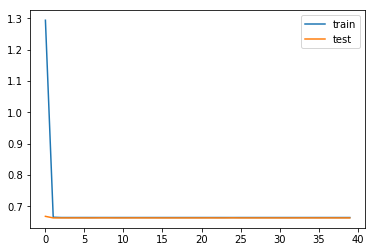

In [28]:
from matplotlib import pyplot
%matplotlib inline
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
# make a prediction
yhat = model.predict(test_X)

In [30]:
count = 0
for i in range(len(yhat)):
    if yhat[i][0] > yhat[i][1] and test_y2[i][0] > test_y2[i][1]:
        count = count + 1
    elif yhat[i][0] <= yhat[i][1] and test_y2[i][0] <= test_y2[i][1]:
        count = count + 1
print(count/len(yhat))

0.6229263266357548


In [42]:
inv_yhat = scaler_dict['Temperature4'].inverse_transform(yhat.reshape(-1, 1) )
inv_y = scaler_dict['Temperature4'].inverse_transform(test_y.reshape(-1, 1))

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(rmse)
# calculate average error percentage
avg = np.average(inv_y)
error_percentage = rmse / avg
print(error_percentage)

2.2724835152589096
0.10350103724235254


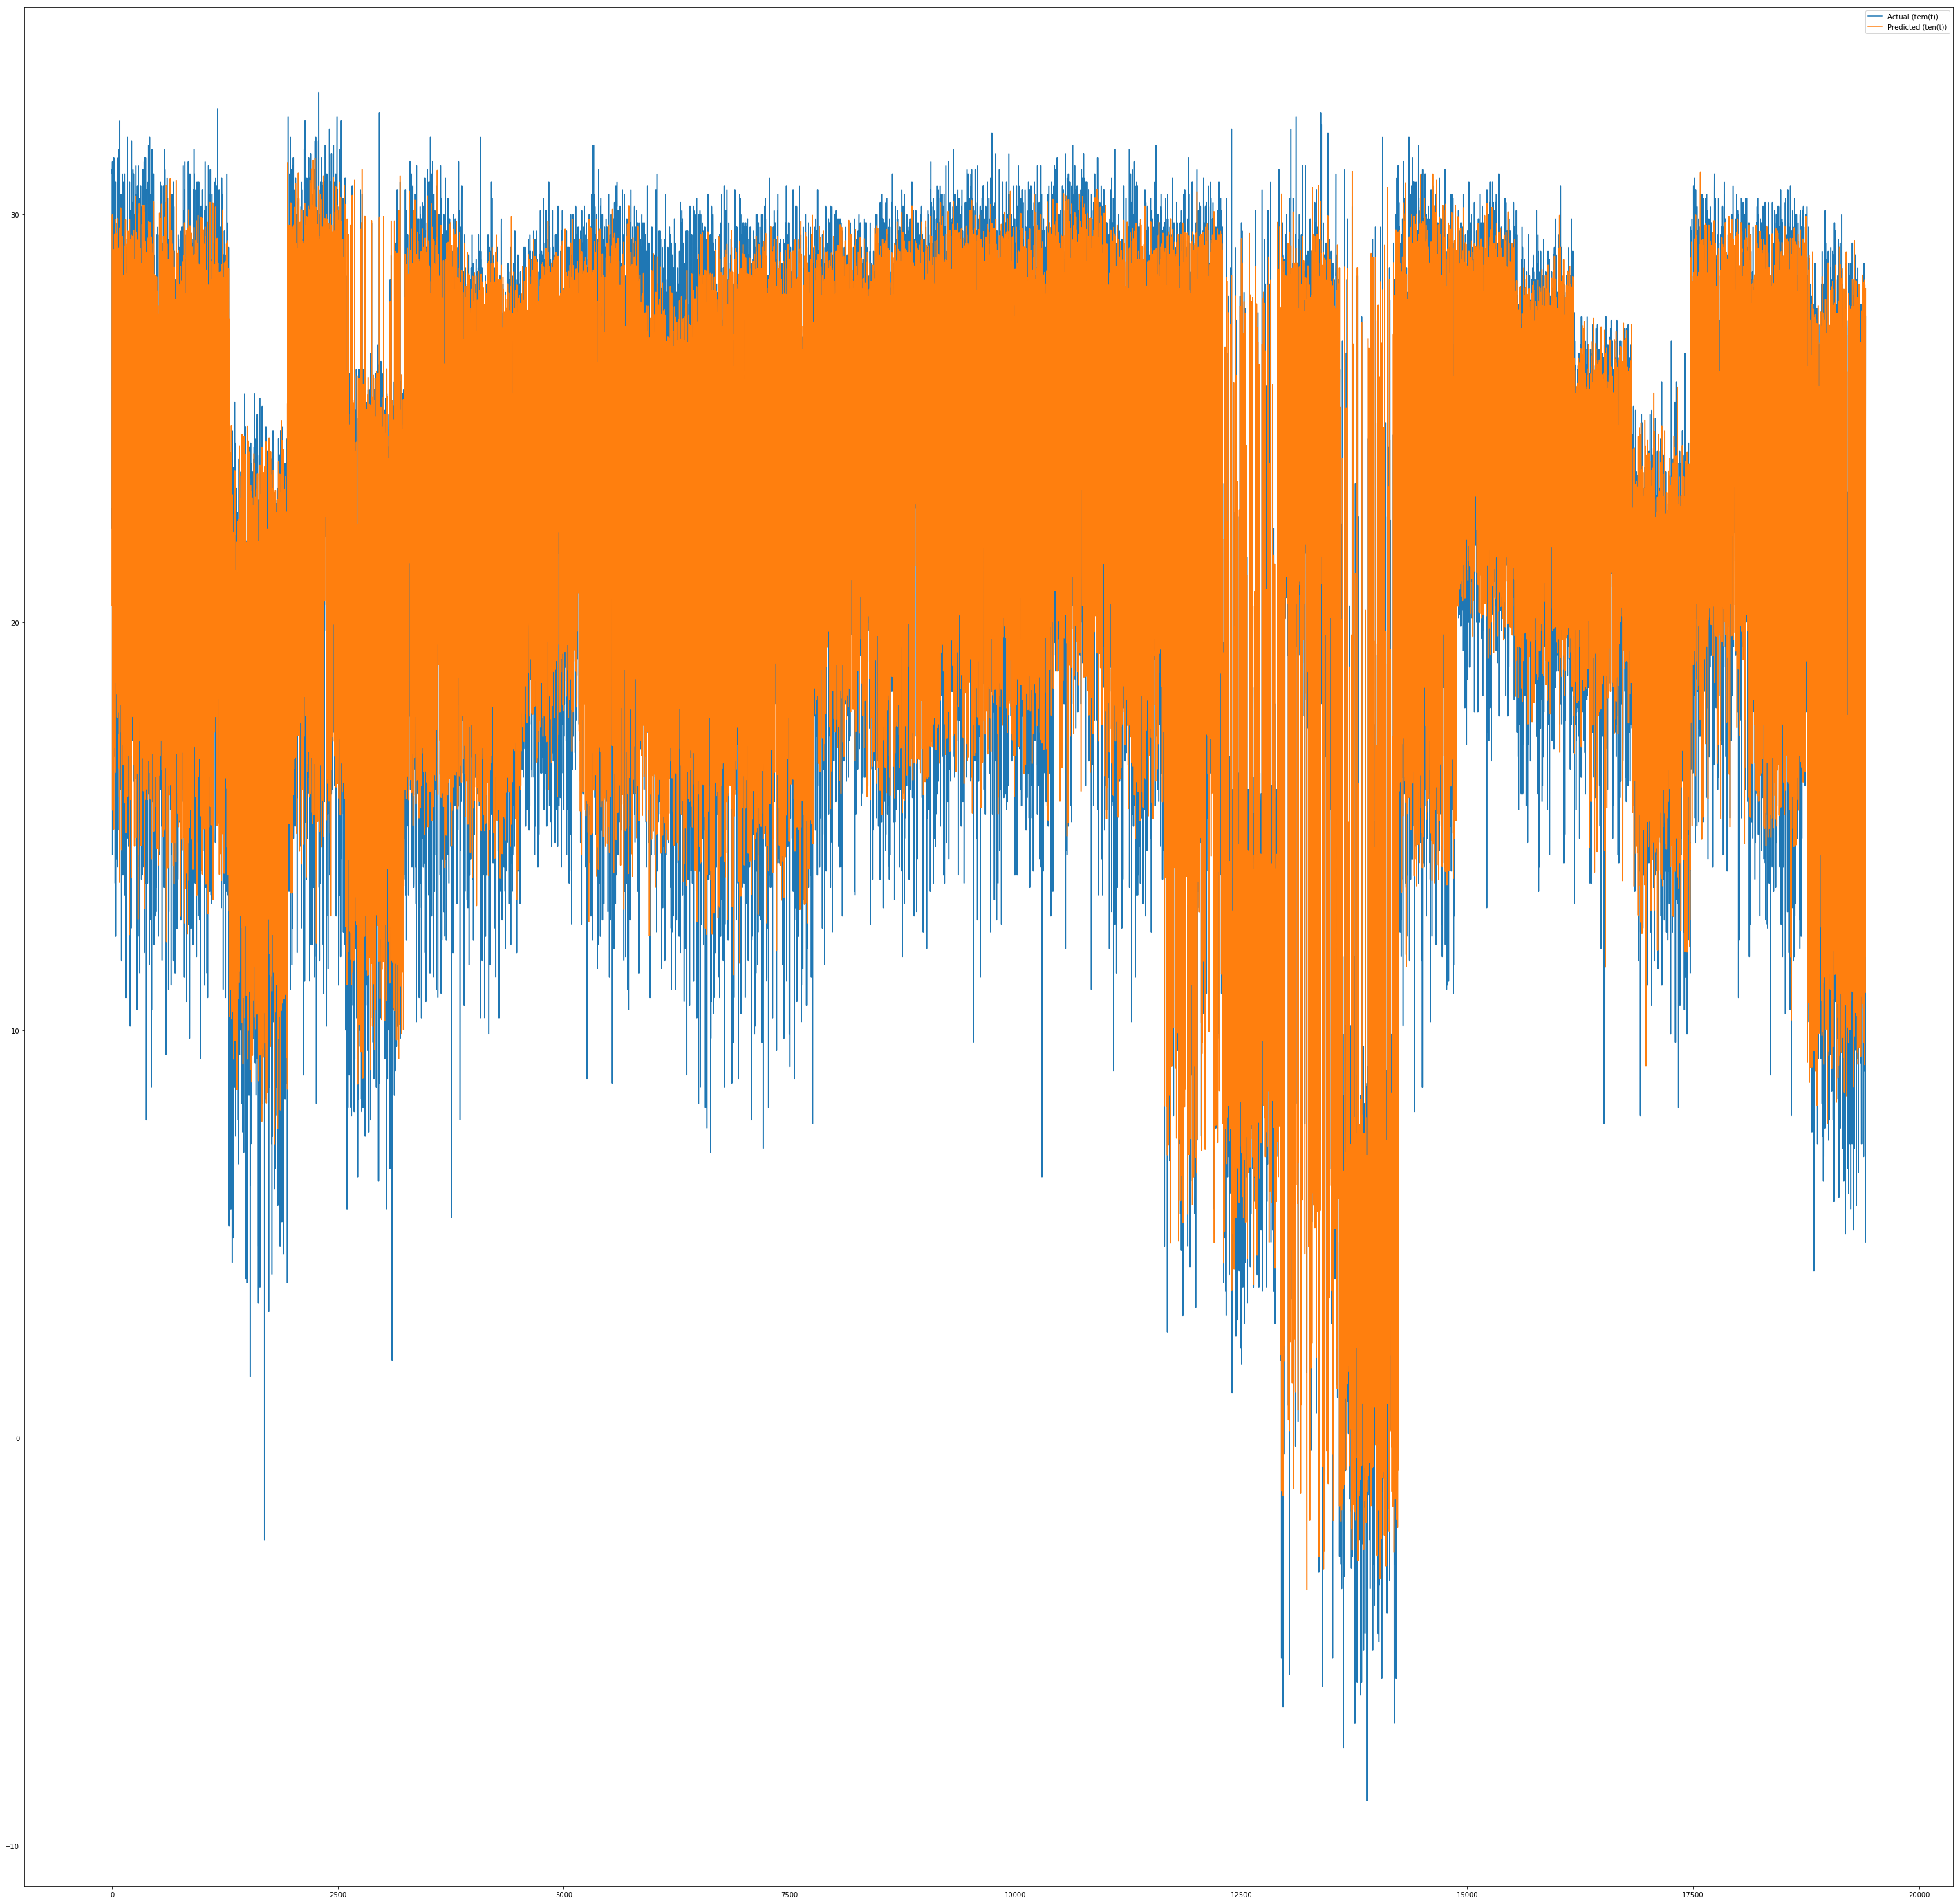

In [22]:
from matplotlib import pyplot
%matplotlib qt5
pyplot.rcParams['figure.figsize'] = (50, 50)
pyplot.plot(inv_y, label="Actual (%s)" % 'tem(t)')
pyplot.plot(inv_yhat, label="Predicted (%s)" % 'ten(t)')
pyplot.legend()

In [44]:
from sklearn.metrics import explained_variance_score, mean_absolute_error,median_absolute_error,r2_score,mean_squared_error
print("The Explained Variance: %.2f" % explained_variance_score(inv_y, inv_yhat))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(inv_y,inv_yhat))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(inv_y, inv_yhat))
print("The r2_score: %.2f" % r2_score(inv_y, inv_yhat)) 
print("The mse: %.2f" % mean_squared_error(inv_y, inv_yhat))

The Explained Variance: 0.88
The Mean Absolute Error: 1.71 degrees Celcius
The Median Absolute Error: 1.32 degrees Celcius
The r2_score: 0.87
The mse: 5.16


In [45]:
model.save('temMLP.h5')